In [1]:
import pandas as pd
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt



In [2]:
# load data
dataset = pd.read_csv('data/select-data.csv', delimiter=",")

In [3]:
dataset.head()

,Unnamed: 0,Age,CreditScore,EB,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,0,0.324324,0.538,0.000000,0.506735,0,0.0,1,1,0.000000,0.2,1
1,1,0.310811,0.516,0.000070,0.562709,0,0.5,0,1,0.000000,0.1,0
2,2,0.324324,0.304,0.000132,0.569654,0,0.0,1,0,0.666667,0.8,1
3,3,0.283784,0.698,0.000000,0.469120,0,0.0,0,0,0.333333,0.1,0
4,4,0.337838,1.000,0.000150,0.395400,0,0.5,1,1,0.000000,0.2,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8149 entries, 0 to 8148
Data columns (total 12 columns):
Unnamed: 0         8149 non-null int64
Age                8149 non-null float64
CreditScore        8149 non-null float64
EB                 8149 non-null float64
EstimatedSalary    8149 non-null float64
Gender             8149 non-null int64
Geography          8149 non-null float64
HasCrCard          8149 non-null int64
IsActiveMember     8149 non-null int64
NumOfProducts      8149 non-null float64
Tenure             8149 non-null float64
Exited             8149 non-null int64
dtypes: float64(7), int64(5)
memory usage: 764.1 KB


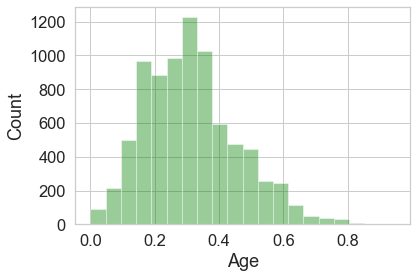

In [5]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(dataset["Age"].dropna(),
                 bins=20,
                 kde=False,
                 color="green")
    plt.ylabel("Count")

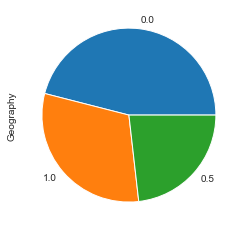

In [6]:
dataset["Geography"].value_counts().plot(x=None, y=None, kind='pie') 

[Text(0.5, 0, 'Geography')]

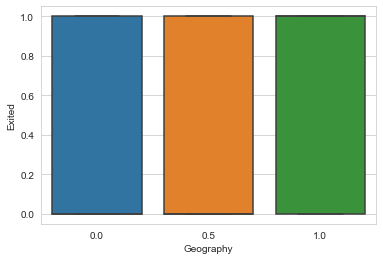

In [7]:

boxplot1=sns.boxplot(x='Geography', y='Exited', data=dataset)
boxplot1.set(xlabel='Geography')


[Text(0.5, 0, 'Gender')]

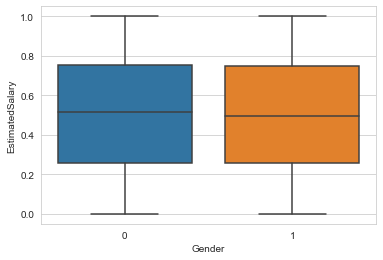

In [8]:
boxplot1=sns.boxplot(x='Gender', y='EstimatedSalary', data=dataset)
boxplot1.set(xlabel='Gender')

In [9]:
dataset.describe()

,Unnamed: 0,Age,CreditScore,EB,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000
mean,3742.249724,0.312625,0.597228,0.000562,0.503989,0.503129,0.423978,0.703276,0.456866,0.168978,0.498466,0.499939
std,2563.306075,0.144169,0.196798,0.015898,0.288931,0.500021,0.431580,0.456842,0.498167,0.223980,0.290930,0.500031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1682.000000,0.202703,0.462000,0.000000,0.256394,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
50%,3363.000000,0.297297,0.600000,0.000076,0.505535,1.000000,0.500000,1.000000,0.000000,0.000000,0.500000,0.000000
75%,5051.000000,0.405405,0.734000,0.000150,0.751153,1.000000,1.000000,1.000000,1.000000,0.333333,0.800000,1.000000
max,9998.000000,0.945946,1.000000,1.000000,0.999891,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#total rows count
print("total rows:",dataset.shape[0])

#Detect null values
null_columns=dataset.columns[dataset.isnull().any()]
print(dataset[dataset.isnull().any(axis=1)][null_columns].count())

total rows: 8149
Series([], dtype: int64)


In [11]:
#去掉无用字段
dataset.drop(dataset.columns[0], inplace=True, axis=1)


In [12]:
dataset.head()

,Age,CreditScore,EB,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,0.324324,0.538,0.000000,0.506735,0,0.0,1,1,0.000000,0.2,1
1,0.310811,0.516,0.000070,0.562709,0,0.5,0,1,0.000000,0.1,0
2,0.324324,0.304,0.000132,0.569654,0,0.0,1,0,0.666667,0.8,1
3,0.283784,0.698,0.000000,0.469120,0,0.0,0,0,0.333333,0.1,0
4,0.337838,1.000,0.000150,0.395400,0,0.5,1,1,0.000000,0.2,0


In [13]:
#查看两类标签的分类数量
dataset.Exited.value_counts()

0    4075
1    4074
Name: Exited, dtype: int64

In [14]:
#构建训练集
X = dataset.iloc[:,0:len(dataset.columns.tolist())-1].values
y = dataset.iloc[:,len(dataset.columns.tolist())-1].values

# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [15]:
#标准化数据（可选）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# fit model no training data
#训练
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [17]:
# make predictions for test data
y_pred = model.predict(X_test)


predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 83.25%


In [18]:
dtest_predprob = model.predict_proba(X_test)[:,1]



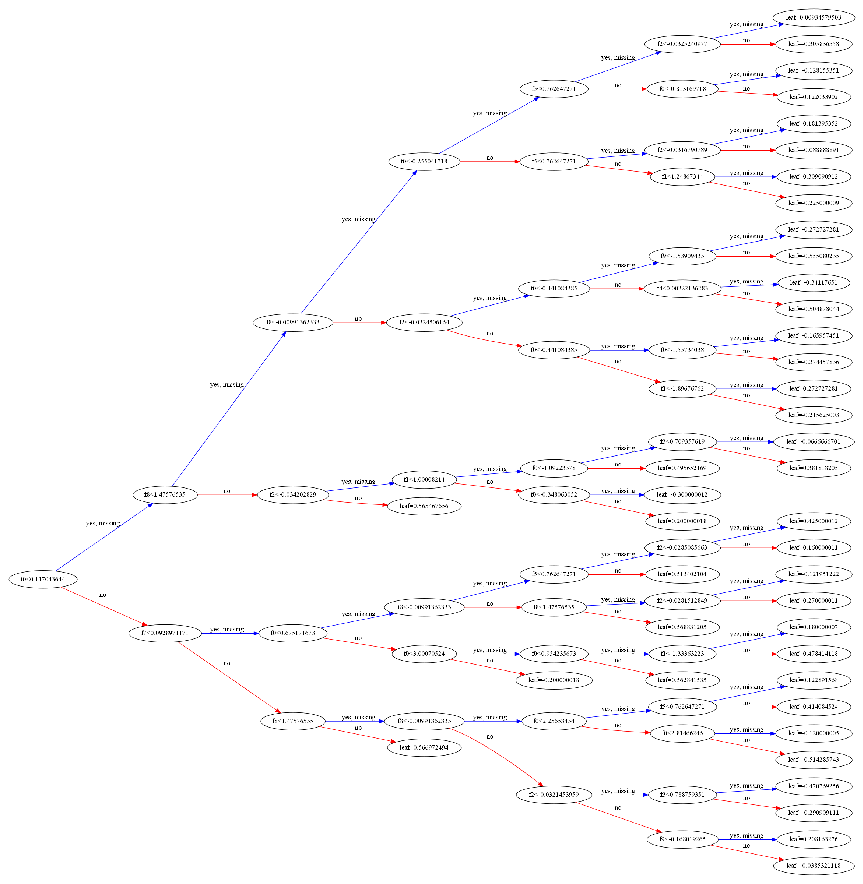

In [19]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(20, 16))
plot_tree(model, num_trees=0, rankdir='LR',ax=ax)
plt.show()

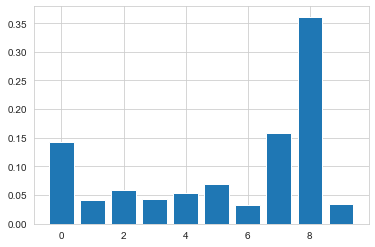

In [20]:
from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [21]:
#对比逻辑回归算法
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = model_lg.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.6950920245398773


No handles with labels found to put in legend.


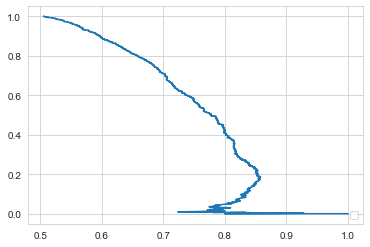

In [23]:
#对比SVM算法
import sklearn.svm
import sklearn.metrics
from matplotlib import pyplot as plt

clf_svm = sklearn.svm.LinearSVC().fit(X_train, y_train)
decision_values = clf_svm.decision_function(X_train)

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_train, decision_values)

plt.plot(precision,recall)
plt.legend(loc="lower right")
plt.show()

In [24]:
y_pred_svm = clf_svm.predict(X_test)
print(pd.crosstab(y_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted']))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))

print(sklearn.metrics.roc_auc_score(y_test, y_pred_svm))
print(sklearn.metrics.f1_score(y_test, y_pred_svm))

Predicted    0    1
Actual             
0          599  248
1          248  535
0.6957055214723926
0.6832694763729247
0.6952356826964978
0.6832694763729247


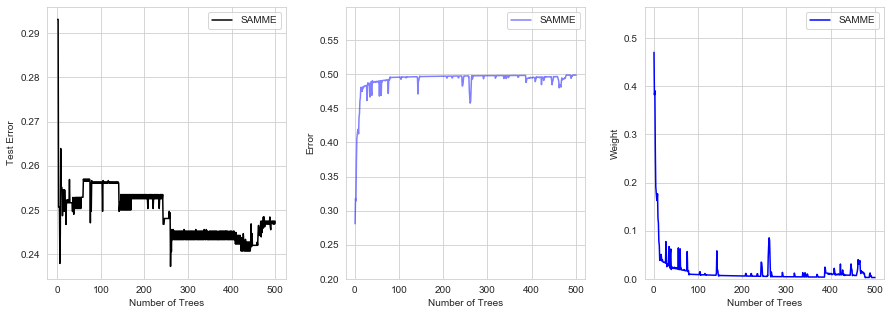

In [25]:
#对比adaboost

from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier



bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=500,
    learning_rate=.5,
    algorithm="SAMME")

bdt_discrete.fit(X_train, y_train)

discrete_test_errors = []


for discrete_train_predict in bdt_discrete.staged_predict(X_test):
    discrete_test_errors.append(1. - recall_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.legend()
# plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,discrete_estimator_errors.max() * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [26]:

y_pred_adaboost = bdt_discrete.predict(X_test)
print(accuracy_score(y_test, y_pred_adaboost))
print(recall_score(y_test, y_pred_adaboost))

# print(sklearn.metrics.roc_auc_score(y_test, y_pred))
print(sklearn.metrics.roc_auc_score(y_test, bdt_discrete.predict_proba(X_test)[:,1]))

print(sklearn.metrics.f1_score(y_test, y_pred_adaboost))

0.7638036809815951
0.7573435504469987
0.850191721665076
0.7549331635900699


In [27]:
#随机森林
from sklearn.ensemble import RandomForestClassifier


classifier_rf = RandomForestClassifier(n_estimators = 10, max_depth = 8, criterion = 'entropy',random_state = 42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)
print(pd.crosstab(y_test, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class']))


print(accuracy_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(f1_score(y_test, y_pred_rf))
print(sklearn.metrics.roc_auc_score(y_test, y_pred_rf))



Predicted Class    0    1
Actual Class             
0                668  179
1                184  599
0.7773006134969325
0.7650063856960408
0.7674567584881485
0.7768361326355058


No handles with labels found to put in legend.


Logististics AUC: 0.759
SVM AUC: 0.695
Random Forest AUC: 0.777
XGBoost AUC: 0.913


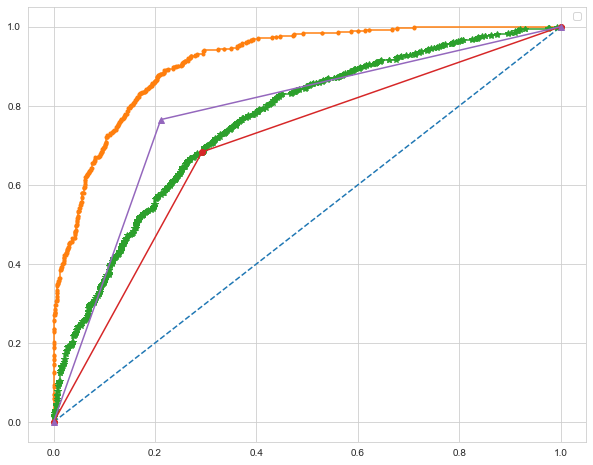

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

fig, ax = plt.subplots(figsize=(10, 8))


probs_lg = model_lg.predict_proba(X_test)[:,1]
auc_lg = roc_auc_score(y_test, probs_lg)
print('Logististics AUC: %.3f' % auc_lg)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, probs_lg)


probs_svm = y_pred_svm
auc_svm = roc_auc_score(y_test, probs_svm)
print('SVM AUC: %.3f' % auc_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm)

probs_rf = y_pred_rf
auc_rf = roc_auc_score(y_test, probs_rf)
print('Random Forest AUC: %.3f' % auc_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

probs_xgb = dtest_predprob
# calculate AUC
auc_xgb = roc_auc_score(y_test, probs_xgb)
print('XGBoost AUC: %.3f' % auc_xgb)
# calculate roc curve
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, probs_xgb)

pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for models
pyplot.plot(fpr_xgb, tpr_xgb, marker='.')
pyplot.plot(fpr_lg, tpr_lg, marker='*')
pyplot.plot(fpr_svm, tpr_svm, marker='o')
pyplot.plot(fpr_rf, tpr_rf, marker='^')
pyplot.legend(loc="best")

pyplot.show()